# Uncertainties
The Python package *uncertainties* allows you to create and do calculations involving quantites with uncertainties.

## Notation
The result of a measurement will give a best value and an unceratinty which we write as

$x\pm\delta x$

The quantity $\delta x$ is called the uncertainty or the absolute uncertainty. 
The uncertainty can never be negative, $\delta x\geq 0$.

The quantity $\frac{\delta x}{\left|x\right|}$ is called the relative uncertainty, when $x\neq 0$.

An concrete example is a length that has been measured to $1.34\pm 0.05$ m. Here the relative uncertainty is
$\frac{0.05}{1.34}=0.037=3.7\%$

## Python package *uncertainties*
The Python package *uncertainties* allows you to create and do calculations involving quantites with uncertainties.
If you haven't installed the package it can be installed with the command *pip install uncertainties*. 


## Creating quantites with uncertainties
There are two easy ways to create a quantity with uncertainty.
The first is to call the ufloat function that creates such a quantity. The ufloat funkction takes two arguments, the value and the uncertainty.
The second way is to create a quantity with uncertainty from a string with the ufloat_fromstr function.
The functions are used as in the example
```python
x = unc.ufloat(3.0,0.3)
g = ufloat_fromstr("9.82+/-0.01")
```

In [1]:
import numpy as np
from uncertainties import *
x = ufloat(3.0,0.3)
g = ufloat_fromstr("9.82+/-0.01")
print(x)
print(g)

ModuleNotFoundError: No module named 'uncertainties'

## Accessing value and uncertainty
You can access the value and uncertain of the ufloat objects as in this example with the acceleration of gravity, $g$, as defined above.
The g.nominal_value is the value, and g.std_dev is the uncertainty; 
the latter can be changed (for independent variables) by referring to it in the same way.
>```python
>g.nominal_value
>g.std_dev
>```

In [3]:
g = ufloat(9.820,0.005)
print(g.nominal_value)
print(g.std_dev)

9.82
0.005


You can perform almost all normal calculations with quantities with uncertainty as you would with normal numbers (we will return to functions like sin, cos, tan, log, exp etc. shortly).

In the example below we see that the uncertainty in the arguments lead to an uncertainty in the computed quantity, this is called error propagation.

In [4]:
z = x**2 * g
print(z)

88+/-18


Now we change the uncertainty of x to 0.1 and inspect the value of z we just computed.

In [5]:
x.std_dev = 0.1
print(z)

88+/-6


We see that the uncertainty is updated instantly.

If you define, say, x, y, and z as quantities with uncertainties, and based on these calculate some function values, say,
u=f(x,y,z) and v=g(x,y,u), you can change the uncertaintites of x, y, and z, but not u and v as these are calculated quantities.
When changing the uncertainties, the uncertainties of u and v are instantly updated.

## Rounding of physical quantities with uncertainties


In [3]:
from uncertainties import *
x = ufloat(3.0,0.15)
print(x)
x = ufloat(3.0,0.25)
print(x)
x = ufloat(3.0,0.35)
print(x)
x = ufloat(3.0,0.42)
print(x)
x = ufloat(3.0,0.45)
print(x)
x = ufloat(3.0,0.55)
print(x)


3.00+/-0.15
3.00+/-0.25
3.00+/-0.35
3.0+/-0.4
3.0+/-0.5
3.0+/-0.6


## Physical calculations with uncertainties
Most function inluding simple arithmetic, trigonometric functions, logarithmic and exponential functions can handle uncertainties. We can import thes with import \* from uncertainties.umath.\*, we will import them a litte later when we need them.

Let us consider an example, where we calculate the energy of a particle.

The total mechanical energy of a particle with mass, $m$, height, $h$, and speed, $v$, can be calculated with the formula
$E=mgh+\frac{1}{2}mv^2$. We introduce values and uncertainties below, all units are in SI units.

In [6]:
m = ufloat(0.500,0.001)
g = ufloat(9.820,0.005)
h = ufloat(2.13,0.01)
v = ufloat(4.17,0.15)
E = m*g*h+1/2*m*v**2 # total mechanical energy, is the sum of the potential energy and the kinetic energy
print(E)

14.81+/-0.32


If the value of, say, $h$ had a different uncertainty, you can update this and the value of the total energy, $E$, will instantly be updated.

In [7]:
h.std_dev = 0.03
print(E)

14.81+/-0.35


The mathematical functions are in uncertainties.umath, here we compute the sine of a number with uncertainty, $36.0\pm 0.3  ^\text{o}$. Trigonometric functions should always be computer with arguments in radians.

In [8]:
from uncertainties.umath import *
x = ufloat(36.0 * np.pi / 180.0, 0.3 * np.pi / 180.0)
print('x =',x)
y = sin(x)
print('y =',y)

x = 0.628+/-0.005
y = 0.588+/-0.004


## Printing quantities with uncertainty
ufloats are usually printed automatically with print, often with many digits, most of which are not physically significant. 
To see them in a more readable manner you can use string formatting.

>Print with one digit in the uncertainty.
>```python
>print('{:.1u}'.format(x))
>```
>Print with two digits in the uncertainty.
>```python
>print('{:.2u}'.format(x))
>```
>Print with three digits in the uncertainty.
>```python
>print('{:.3u}'.format(x))
>```

Note in the output below that rounding takes place for instance for two digits where 0.0126 is rounded to 0.013.

In [24]:
g = ufloat_fromstr("9.82+/-0.0126")
print('{:.1u}'.format(g))
print('{:.2u}'.format(g))
print('{:.3u}'.format(g))


9.82+/-0.01
9.820+/-0.013
9.8200+/-0.0126


## How to determine uncertainty from calculations - Error propagation
Here is a brief review of how to calculate uncertainties in different expressions.
It is assumed that the uncertainties are small. 

### Addition and subtraction
If we add a number of variable, each with uncertainties,
$y=x_0\pm x_2\pm \ldots \pm x_{N-1}$
we can compute the uncertainty in the result by so-called addition in quadrature,
where one compute the square root of the sum of the squares of the uceratinties.

>$\delta y=\sqrt{\delta x_0^2+\delta x_1^2+\ldots+\delta x_{N-1}^2}$

This formula is valid if the uncertainties are independent.
In case of dependent uncertainties, which typically arise when doing calculations with already computed quantities,
the uncertainty can be computed by

>$\delta y=\delta x_0+\delta x_1+\ldots+\delta x_{N-1}$

### Multiplication and division
If we multiply and divide a number of quantities with uncertainties like in

$z=x_0\cdot x_1\cdot \ldots \cdot x_{N-1}\cdot y_0^{-1}\cdot y_1^{-1}\cdot \ldots \cdot y_{M-1}^{-1}$

the relative uncertainty in the result can be computed a addition in quadrature of the relative undertainties:

>$\frac{\delta z}{\left| z\right|}=\sqrt{\left(\frac{\delta x_0}{x_0}\right)^2+\left(\frac{\delta x_1}{x_1}\right)^2+\ldots+\left(\frac{\delta x_{N-1}}{x_{N-1}}\right)^2+\left(\frac{\delta y_0}{y_0}\right)^2+\left(\frac{\delta y_1}{y_1}\right)^2+\ldots +\left(\frac{\delta y_{M-1}}{y_{M-1}}\right)^2}$

If we have dependent uncertainties we instead us the forumula 

>$\frac{\delta z}{\left| z\right|}=\left|\frac{\delta x_0}{x_0}\right|+\left|\frac{\delta x_1}{x_1}\right|+\ldots+\left|\frac{\delta x_{N-1}}{x_{N-1}}\right|+\left|\frac{\delta y_0}{y_0}\right|+\left|\frac{\delta y_1}{y_1}\right|+\ldots +\left|\frac{\delta y_{M-1}}{y_{M-1}}\right|$

### Functions with uncertainty
Consider a function $y=f(x)$ where $x$ has uncertainty, $\delta x$.
We can approximate the function near $x$ by 

$f(x+\Delta x) \approx f(x)+f'(x)\Delta x$

Sustracting $f(x)$ from both sides gives an expression for the uncertainty: 

>$\delta y=\left|f(x_0)\right|\delta x$

For more than one independent variable, like in $z=f(x,y)$, we get

>$\delta z=\sqrt{\left(\frac{\partial f}{\partial x}\delta x\right)^2+\left(\frac{\partial f}{\partial y}\delta y\right)^2}$

and for dependent uncertaintites we get

>$\delta z=\left|\frac{\partial f}{\partial x}\delta x\right|+\left|\frac{\partial f}{\partial y}\delta y\right|$

The formulas generalize to any number of variables.


### Examples of error propagation
We now use error propagation to compute the momentum, $p=mv$, and kinetic energy, $K=\frac{1}{2}mv^2$, of an object.
First we do the calculation with ufloat variables and then use the definition of error propagation using
the *sympy* package.

In [1]:
from uncertainties import *
from uncertainties.umath import *
print('Calculation of momentum and kinetic energy using ufloat.')
m = ufloat(10.0,0.3)
v = ufloat(15.0,1.5)
p = m*v
print('p =',p)
E = 1/2*m*v**2
print('E =',E)
print('Computing expressions for the uncertainties in momentum and kinetic energy using sympy.')
import sympy as sp
m,v,dm,dv = sp.symbols('m,v,dm,dv')
p = m*v
dp = sp.sqrt((p.diff(m)*dm)**2+(p.diff(v)*dv)**2)
E = sp.Rational(1,2)*m*v**2
dE = sp.sqrt((E.diff(m)*dm)**2+(E.diff(v)*dv)**2)
display(dp)
display(dE)
print('Inserting uncertaintities in the expression from error propagation.')
print('dp=',dp.subs({m:10.0,v:15.0,dm:0.3,dv:1.5}))
print('dE=',dE.subs({m:10.0,v:15.0,dm:0.3,dv:1.5}))

Calculation of momentum and kinetic energy using ufloat.
p = 150+/-16
E = (1.12+/-0.23)e+03
Computing expressions for the uncertainties in momentum and kinetic energy usign sympy.


sqrt(dm**2*v**2 + dv**2*m**2)

sqrt(dm**2*v**4/4 + dv**2*m**2*v**2)

Inserting uncertaintities in the expression from error propagation.
dp= 15.6604597633658
dE= 227.517169681763


## Data statistics
Let
$x_0,x_1,\ldots ,x_{N-1}$
be a set of $N$ data points from the measurement of some physical quantity.

The best value to represent the data set, in the least square sense, is the mean:

>$\bar x=\frac{x_0+x_1+\ldots +x_{N-1}}{N}$.

The standard deviation for a sample (a measurement is usually a sample) is

>$\delta x=\sqrt{\frac{\sum_{i=0}^{N-1}\left(x_i-\bar x\right)^2}{N-1}}$.

This quantity we interpret as the uncertainty in a single measruement, i.e. $x_0\pm\delta x$.

When doing further calculations, or presenting a result, 
we will usually use the mean, $\bar x$.
The uncertainty of the mean, also called the standard deviation of the mean, is defined by

>$\delta\bar x=\frac{\delta x}{\sqrt{N}}$

which we will refer to as uncertainty or standard uncertainty.
The standard uncertainty is often referred to by the abbreviations sdom or SDOM.

The best quantity to use in further calculations is usually the mean
>$\bar x \pm \delta\bar x$.


## Read data from a csv file

We are now going to import data from a csv file (comma separated file) that contains a temperature measurement over a period of one second.


We first read the data with all columns, and then we will only read the relevation columns, that is the columns that contain time and temperature.
Data is read from the data file to a so-called DataFrame.
We use display to show the data, and call the head method to see the first five entries only. 
If you want to see all data leave out the head method call.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("data/20230627-101440_Therm.csv")
display(df.head())

,index,frame,sample,time,raw[0],cal[0]
0,0,10,0,0.019608,17237,25.8494
1,1,11,0,0.039216,17237,25.8494
2,2,13,0,0.058824,17248,26.0505
3,3,15,0,0.078431,17245,25.9957
4,4,17,0,0.098039,17275,26.5442


If data is in an Excel file you can read in the same way with 
```python
df = pd.read_excel("filename.xslx")
```

### Extract the columns needed
The first column with numbers 0,1,2,3,4 is from the display command, there is no column for that in the data.
We see that there are six columns (which are numbered 0,1,2,3,4,5 - not shown).
The time (in seconds) is in the fourth column and the temperature (in degrees celsius) is in the sixth column.
The fifth columns is the raw measurement for the temperature (it has no units).
To extract the fourth and sixth columns we add the parameter usecols=[3,5].

Note: You can also read columns from their names, as shown on top, however, as these contain some spaces we just read numbered columns.

In [12]:
df = pd.read_csv("data/20230627-101440_Therm.csv",usecols=[3,5])
display(df.head())

,time,cal[0]
0,0.019608,25.8494
1,0.039216,25.8494
2,0.058824,26.0505
3,0.078431,25.9957
4,0.098039,26.5442


### Extract columns to data vectors
We now extrac the time and temperature measurements to two vectors so we can plot them and do calculataions with them.
The strucure they are in is a matrix structure, m.
To extract the time vector we get m[:,0], and to get the temperature vector we use m[:,1].
Then we plot the temperature as a function of time twice, one with a graph (showing lines between data points) and with only data points.

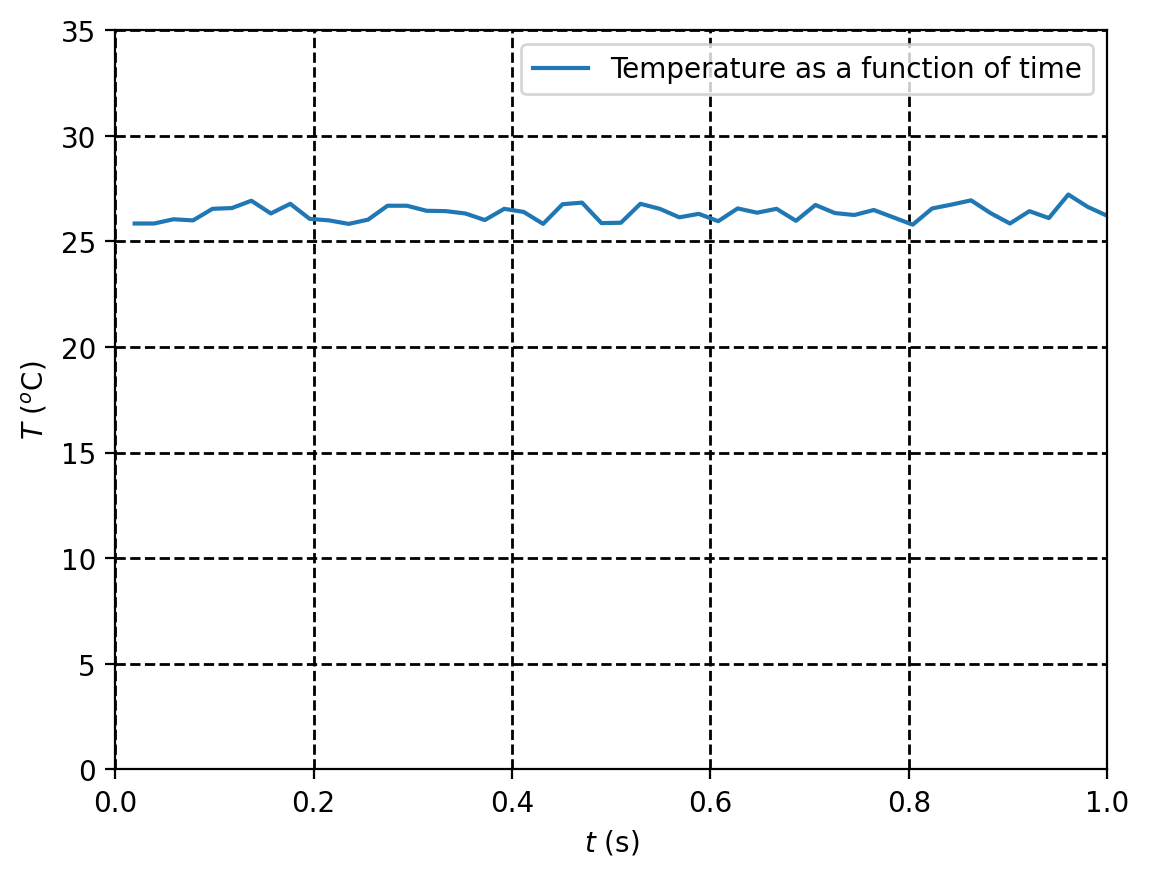

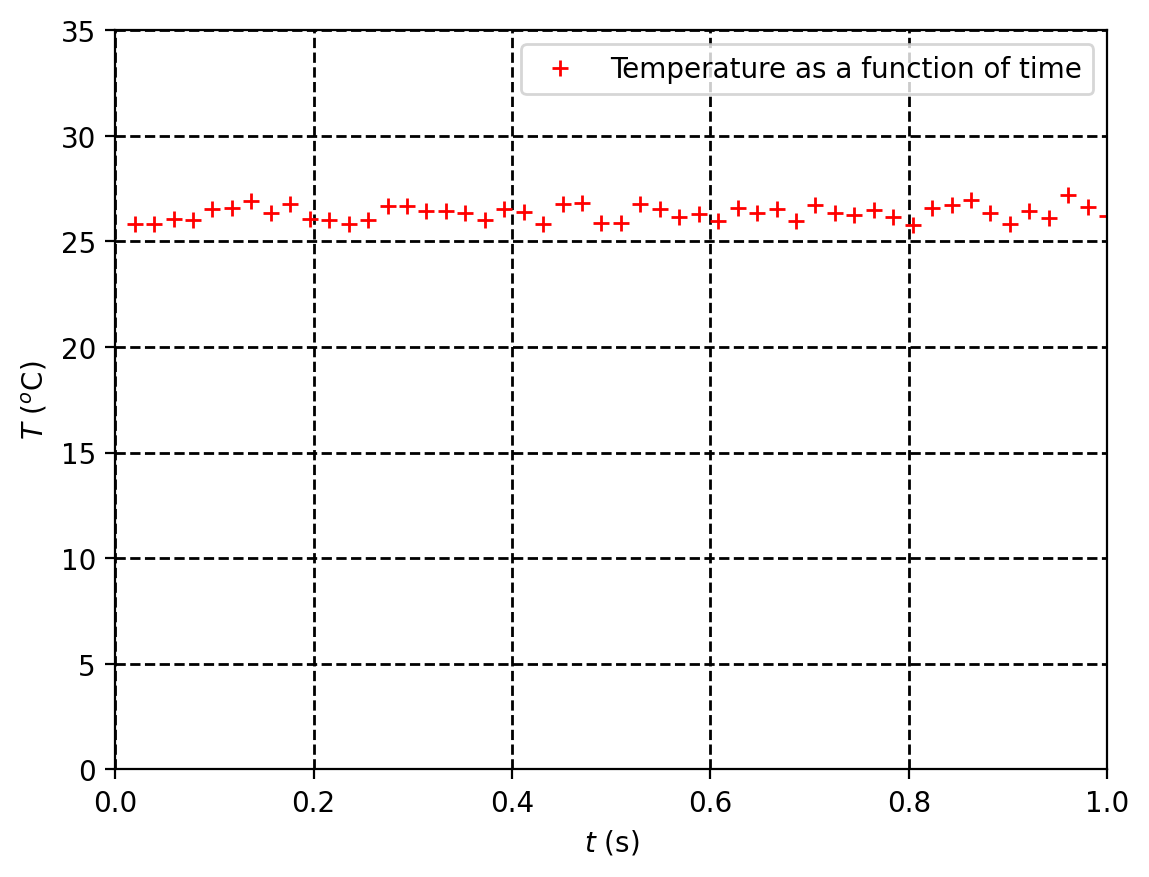

In [13]:
t = df.iloc[:,0]
T = df.iloc[:,1]
plt.figure(dpi=200)
plt.xlabel('$t$ (s)')
plt.ylabel('$T$ ($^o$C)')
plt.xlim(0,1)
plt.ylim(0,35)
plt.grid(color='k',linestyle='--', linewidth=1)
plt.plot(t,T,label='Temperature as a function of time')
#plt.plot(t,T,'r+')
plt.legend()
plt.show()
plt.figure(dpi=200)
plt.xlabel('$t$ (s)')
plt.ylabel('$T$ ($^o$C)')
plt.xlim(0,1)
plt.ylim(0,35)
plt.grid(color='k',linestyle='--', linewidth=1)
plt.plot(t,T,'r+',label='Temperature as a function of time')
plt.legend()
plt.show()
plt.show()

There is clearly fluctuations in the temperature. We now want to quantify them by computing the mean, the standard deviation, and the standard deviation of the mean.


We use numpy that has the methods mean and std to compute the mean and the standard devition. 
The std method has an extra argument ddof=1 that indicates that we have lost one degree of freedom in the
data when computing the mean, which gives the $N-1$ in the denominater shown above.
The standard deviation of the mean (sdom) we compute manually according the formula above.

We print out the first measurement value with uncertainty (the standard deviation), 
and the mean and the standard uncertainty (sdom).
Note that we print out with default format, and with one and two significant figures in the uncertainty.

In [14]:
import numpy as np
T_mean = np.mean(T)
T_std = np.std(T,ddof=1)
T_sdom = T_std / np.sqrt(np.size(T))
print(T_mean,T_std,T_sdom)
T0 = ufloat(T[0],T_std)
print(T0)
print('{:.1u}'.format(T0))
print('{:.2u}'.format(T0))
Tm = ufloat(T_mean,T_sdom)
print(Tm)
print('{:.1u}'.format(Tm))
print('{:.2u}'.format(Tm))

26.344160784313722 0.3558177719442535 0.04982445395967585
25.8+/-0.4
25.8+/-0.4
25.85+/-0.36
26.34+/-0.05
26.34+/-0.05
26.344+/-0.050


## Comparing data
An important application of measurements is determining values for physical quantities.
These are naturally associated with uncertainties and an important question is
whether the result can be said to be consistent with a, say, accepted value.
Let us call the accepted value for a quantity
$x_*$
and the value we have determined we call
$x\pm\delta x$.


In order to quantify how close the measured and accepted value is we compute the standard score, which is the quantity
$\frac{x-x_*}{\delta x}$
that measures how many standard deviations the measured and accepted values from each other. 
A guide to what to conclude is given below.
> For $0\leq \left|\frac{x-x_*}{\delta x}\right|\leq 1$ it is very likely that they are the same.\
> For $1< \left|\frac{x-x_*}{\delta x}\right|\leq 2$ it is likely that they are the same.\
> For $2<\left|\frac{x-x_*}{\delta x}\right|\leq 3$ is a grey-zone.\
> For $3<\left|\frac{x-x_*}{\delta x}\right|$ it is unlikely that they are the same.


Is the measured value
$g=9.820\pm 0.005 \text{m}/\text{s}^2$
consistent with an acceleration of gravity of $9.81 \text{m}/\text{s}^2$?

In [15]:
g = ufloat(9.82,0.005)
g.std_score(9.81)

-1.9999999999999574

The method std_score computes the standard score.

In this case the values are consistent, but it would be nice to have better aggreement, 
as the measaured value is almost exactly two standard deviations away.

### Is the first temperature measurement (T[0]) 26 degrees celsius?

In [16]:
T0 = ufloat(T[0],T_std)
print('{:.2u}'.format(T0))
print(T0.std_score(26.0))

25.85+/-0.36
0.42325035980382525


Probably, as the mean is less than half a standard deviation away from 26 $^\text{o}$C.

### Is the mean temperature measurement 26.5 degrees celsius?

In [112]:
Tm = ufloat(T_mean,T_sdom)
print('{:.2u}'.format(Tm))
print(Tm.std_score(26.5))

26.344+/-0.050
3.1277656512282603


It is very unlikely that the mean temperature is  26.5 $^\text{o}$C, as the value is more than three standard deviations away.